In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_csv("D:\MINE\college\Books\AI and Ml\Project\Customer Segmentation\data\Mall_Customers.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_17212\3693052915.py:1: SyntaxWarning: invalid escape sequence '\M'
  df=pd.read_csv("D:\MINE\college\Books\AI and Ml\Project\Customer Segmentation\data\Mall_Customers.csv")


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


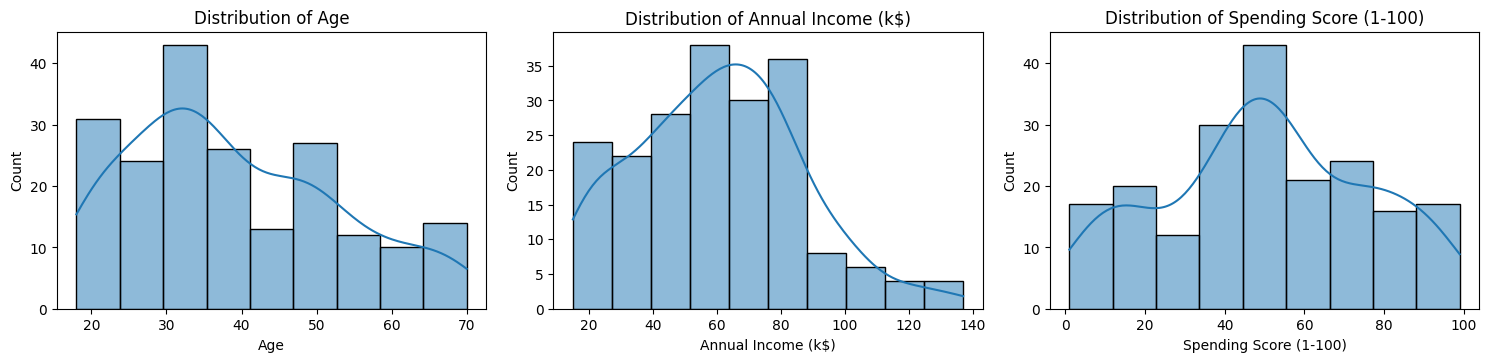

In [7]:
# Distribution of numerical features
numerical_features = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


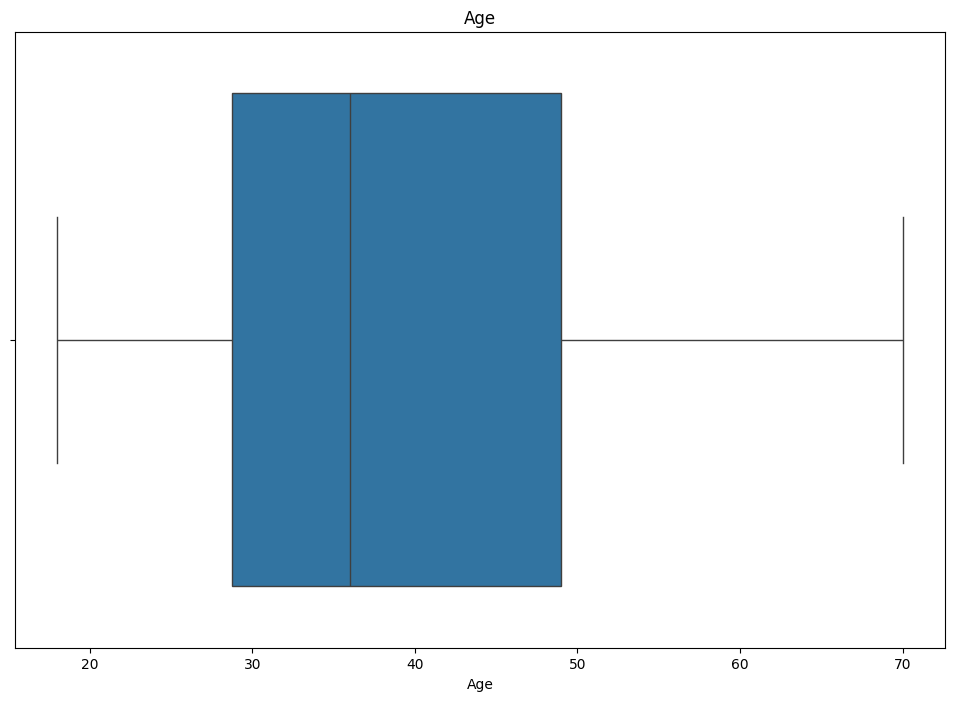

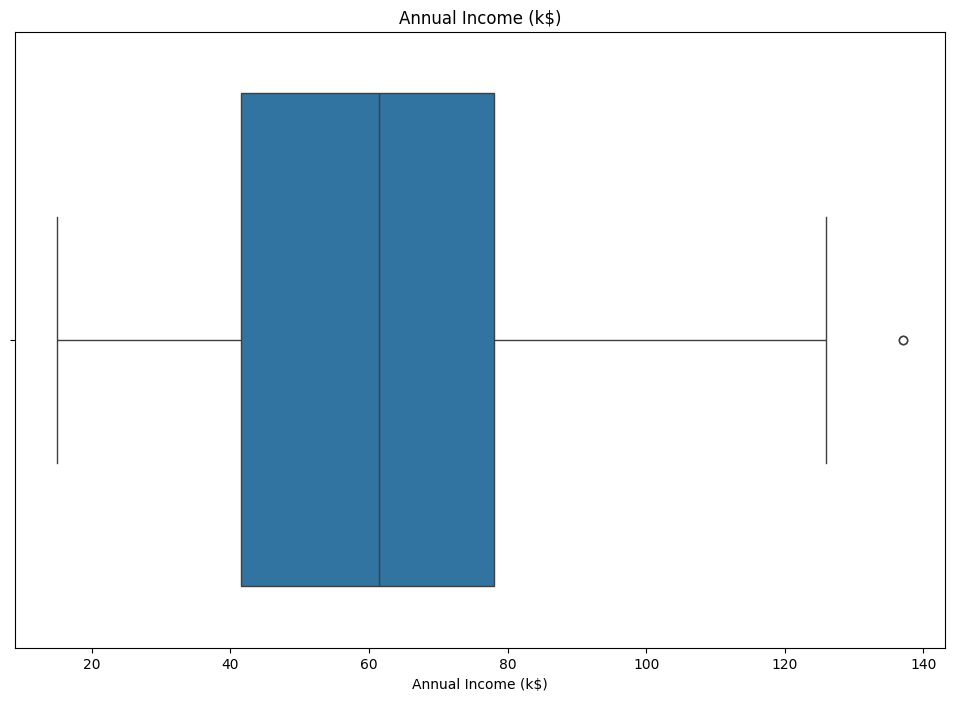

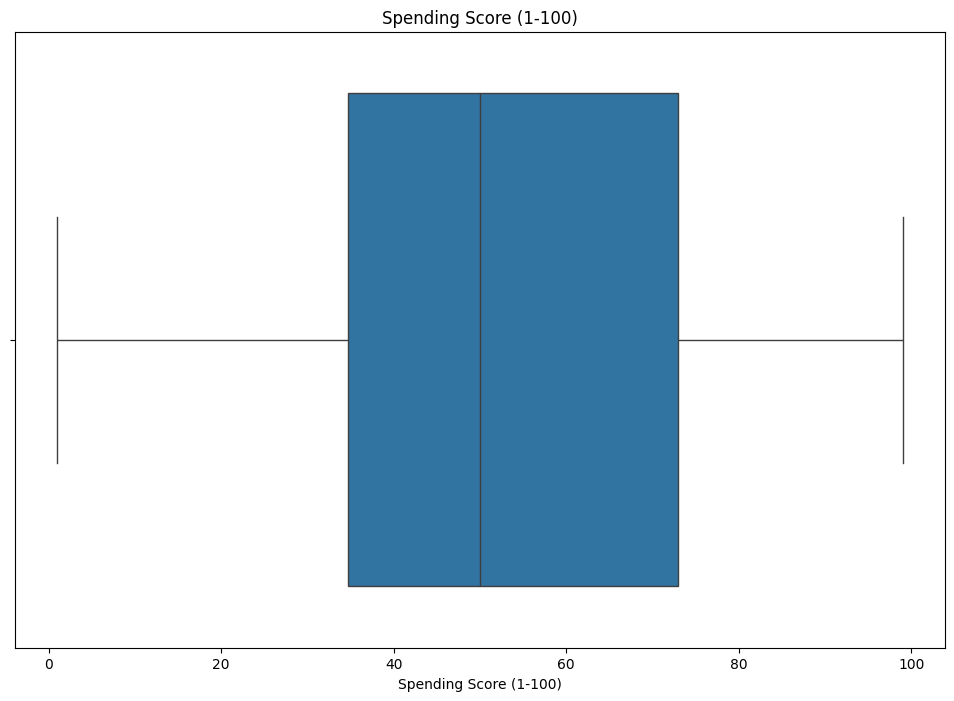

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=df[feature]) 
    plt.title(feature)
    plt.show()

In [9]:
Q1 = df["Annual Income (k$)"].quantile(q = 0.25) 
Q3 = df["Annual Income (k$)"].quantile(q = 0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"]< lower_bound, lower_bound, df["Annual Income (k$)"])
df["Annual Income (k$)"] = np.where(df["Annual Income (k$)"]> upper_bound, upper_bound, df["Annual Income (k$)"])

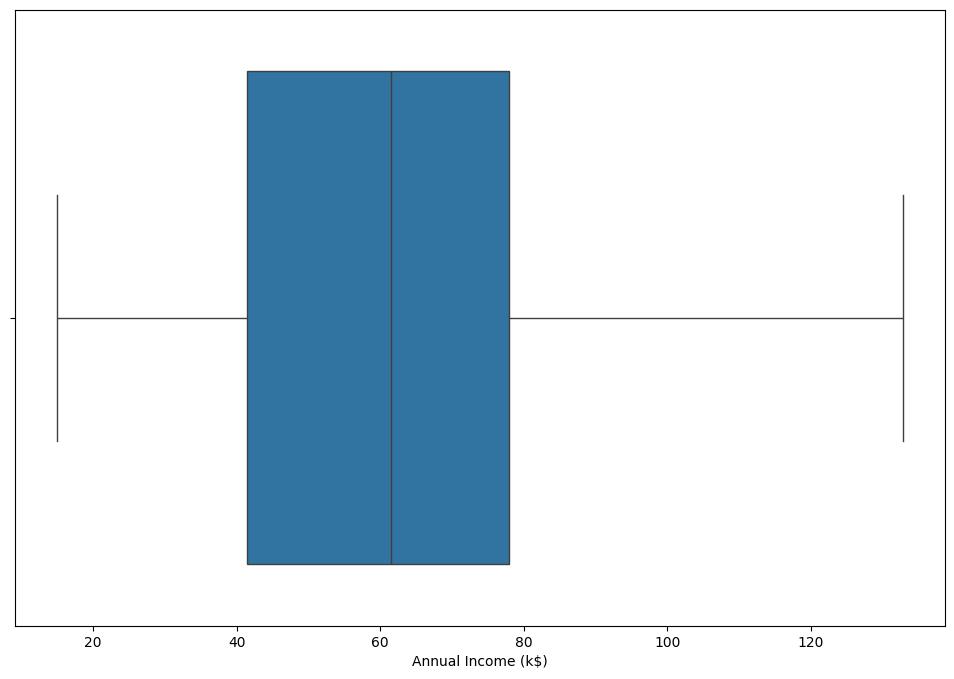

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Annual Income (k$)'])
plt.show()

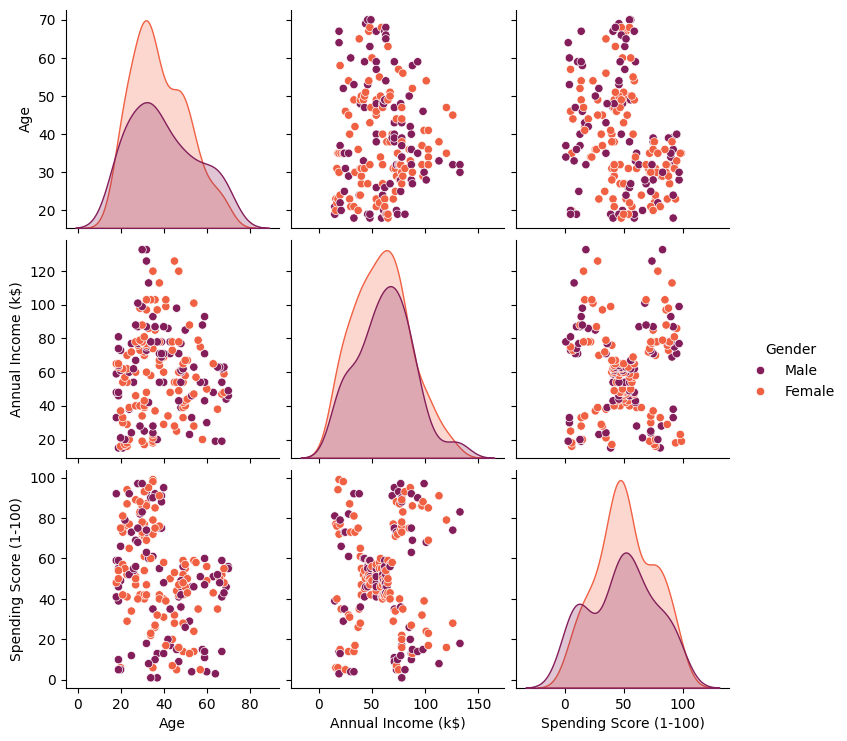

In [11]:
sns.pairplot(df[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']],kind='scatter',diag_kind='kde',palette='rocket',hue='Gender')
plt.show()

In [12]:
X= df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()

In [15]:
scaled_df=scaler.fit_transform(X)

In [10]:
scaled_df

array([[-1.42456879, -1.74542941, -0.43480148],
       [-1.28103541, -1.74542941,  1.19570407],
       [-1.3528021 , -1.70708307, -1.71591298],
       [-1.13750203, -1.70708307,  1.04041783],
       [-0.56336851, -1.66873673, -0.39597992],
       [-1.20926872, -1.66873673,  1.00159627],
       [-0.27630176, -1.6303904 , -1.71591298],
       [-1.13750203, -1.6303904 ,  1.70038436],
       [ 1.80493225, -1.59204406, -1.83237767],
       [-0.6351352 , -1.59204406,  0.84631002],
       [ 2.02023231, -1.59204406, -1.4053405 ],
       [-0.27630176, -1.59204406,  1.89449216],
       [ 1.37433211, -1.55369772, -1.36651894],
       [-1.06573534, -1.55369772,  1.04041783],
       [-0.13276838, -1.55369772, -1.44416206],
       [-1.20926872, -1.55369772,  1.11806095],
       [-0.27630176, -1.51535138, -0.59008772],
       [-1.3528021 , -1.51535138,  0.61338066],
       [ 0.94373197, -1.43865871, -0.82301709],
       [-0.27630176, -1.43865871,  1.8556706 ],
       [-0.27630176, -1.40031237, -0.590

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [17]:
ssd=[]
silhouette=[]
k_range=(2,20)
k_values = range(k_range[0], k_range[1])

for i in range(2,20):
    kModel = KMeans(n_clusters=i,random_state=42)
    kModel.fit(scaled_df)
    ssd.append(kModel.inertia_)
    silhouette.append(silhouette_score(scaled_df,kModel.labels_))
   
    

Text(0, 0.5, ' Sum of Squared Distances')

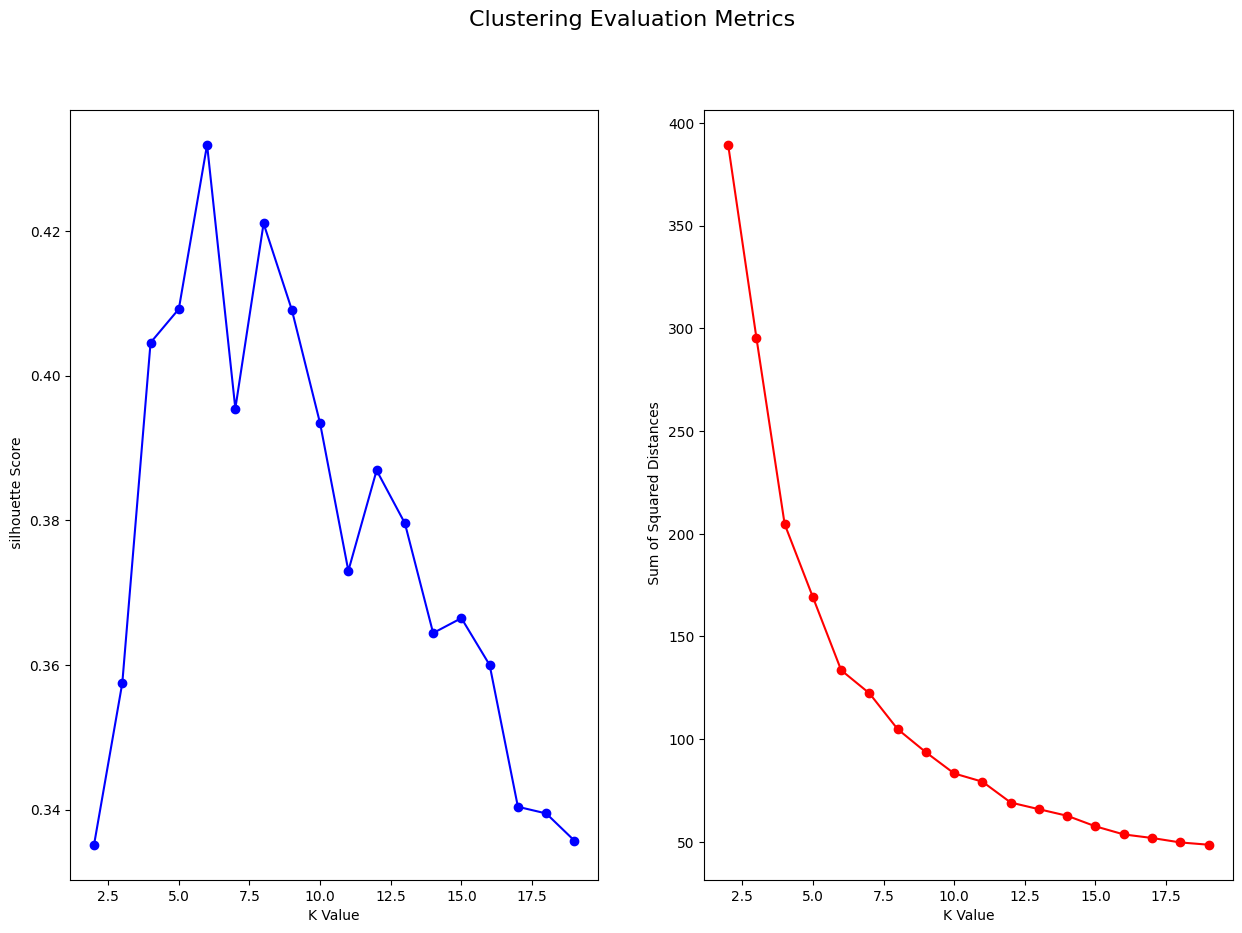

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle('Clustering Evaluation Metrics', fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(range(2,20),silhouette,'bo-')
plt.xlabel("K Value")
plt.ylabel(" silhouette Score") 
plt.subplot(1, 2, 2)

plt.plot(range(2,20),ssd,'ro-')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")



In [19]:
kmeans=KMeans(n_clusters=6,n_init=20,random_state=101)

In [20]:
kmeans.fit_predict(scaled_df)

array([4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 4,
       0, 4, 2, 5, 5, 5, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 2, 5,
       2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 2, 5, 5, 2, 2, 5, 2, 2, 5, 2, 2, 5,
       5, 2, 2, 5, 2, 5, 5, 5, 2, 5, 2, 5, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2,
       2, 5, 5, 5, 5, 5, 2, 2, 2, 2, 5, 5, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1,
       5, 1, 3, 1, 3, 1, 5, 1, 3, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [21]:
df['Cluster']=kmeans.labels_

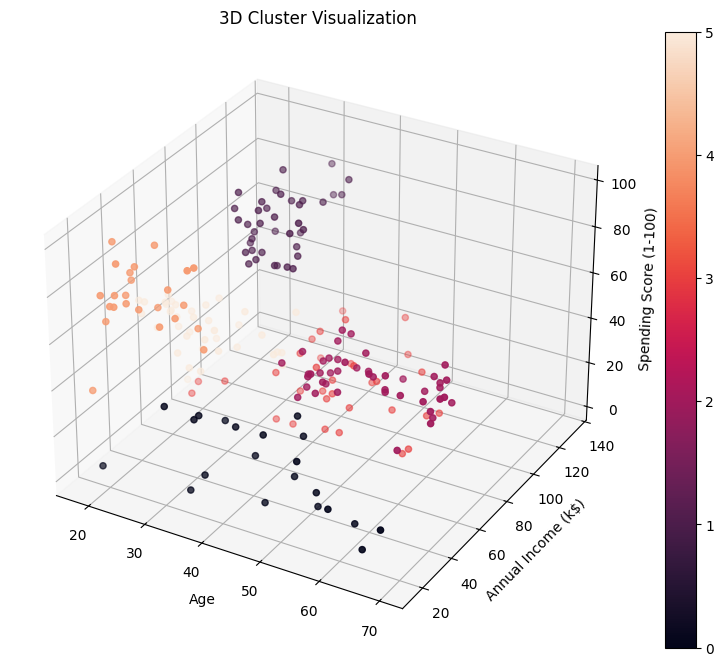

In [22]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatterplot of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rocket')
ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.colorbar(scatter)
plt.show()